<a href="https://colab.research.google.com/github/eunkyeom/NERModel_WusinsaReview/blob/main/%EA%B0%9C%EC%B2%B4%EB%AA%85%EC%9D%B8%EC%8B%9D_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8(%EB%AC%B4%EC%8B%A0%EC%82%AC%EB%A6%AC%EB%B7%B0).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**우신사 리뷰 프로젝트 (2022년 1월)**

# 1. 프로젝트 개요
인간의 자연어를 분석해서 컴퓨터가 이해할 수 있는 인공어로 처리하는 자연어 처리(NLP) 기술은 인공지능의 핵심 기술 중 하나이다. 자연어 처리는 챗봇, 자동번역, 음성인식 서비스 등에 활용되어 주목받고 있는 기술이다. 

본 프로젝트를 통해 자연어 처리의 응용 분야인 개체명 인식 모델을 적용하여 쇼핑몰 리뷰들을 분류/분석하고 클라이언트들의 검색 편의성을 제고할 수 있는 모델을 개발하고자 한다. 인터넷 쇼핑몰인 우신사의 상품 리뷰들을 전처리 작업하고 지도학습 알고리즘을 활용하여 각 개체들을 학습시켜서 해당 단어가 어떤 유형인지 인식하게 하도록 한다.

# 2. 데이터 수집 및 탐색적 데이터 분석 (EDA)

##2-1. 데이터 수집

데이터는 국내 최대 의류 쇼핑몰 중 하나인 우신사(wusinsa.co.kr)의 상품 리뷰를 활용했으며, 리뷰 데이터의 수집은 ~~에서 제작한 웹 크롤링 프로그램을 사용하였다. 2주간 진행되는 프로젝트 기간을 감안하여 7명의 조원들이 총 45개의 상품 카테고리에서 1500여 개의 상품 리뷰를 수집하였고, 수집된 데이터는 탐색적 데이터 처리과정을 거친 후에 전처리 작업을 위해 다시 배분되었다.

##2-2. 탐색적 데이터 분석 (EDA)
추출한 데이터들의 확인 작업을 진행한다.

In [ ]:
import pandas as pd

train = pd.read_csv("train.csv")# 새 섹션

In [ ]:
train.head()

In [ ]:
train.tail()

* 리뷰 데이터들을 살펴보면, 맞춤법이나 띄어쓰기에 맞지 않는 단어들이나 구어체 문장, 신조어, 기타 분류 분석에 크게 영향을 미치지 않는 단어들(이모티콘, 문장부호 등)을 쉽게 발견할 수 있다. 학습 시 예측률을 높이고 정확한 단어로 형태소를 분절하기 위해서는 문장과 단어를 정제하는 "전처리 작업"이 필요하다. 한국어 자연어의 전처리를 위한 패키지를 다운받도록 한다.

# 3. 환경설정

개체명 인식을 위해서는 문장의 형태소들을 분절해서 각 형태소들을 토큰화하는 작업이 필요하다. 파이썬의 한국어 자연어 처리를 위해 개발된 패키지들을 먼저 설치한다.

##3-1. 패키지 설치

**KoNLPy :** 한국어 토큰화를 위한 패키지

**HanSpell :** 한국어 띄어쓰기, 맞춤법을 위한 패키지

**SOYNLP :** 신조어 등의 정제에 필요

**Customized KoNLPy :** 사용자 사전 추가를 통해 토큰화를 용이하게 함

In [ ]:
# 한국어 토큰화에 필요한 KoNLPy
!apt-get update 
!apt-get install g++ openjdk-8-jdk python-dev python3-dev 
!pip3 install JPype1-py3 
!pip3 install konlpy 
!JAVA_HOME="C:\Program Files\Java\jdk1.8.0_301" #본인 pc의 jdk 설치 경로
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:9 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [73.9 kB]
Hit:13 http://ppa.launchpad.net/cran/

In [ ]:
# 설치가 필요한 라이브러리

# 맞춤법, 띄어쓰기 교정을 위한 Hanspell
!pip3 install git+https://github.com/ssut/py-hanspell.git

# 신조어, 반복문자 등 정제하는 SOYNLP
!pip3 install soynlp

# 사용자 사전 추가를 통해 토큰화를 용이하게 하는 Customized KoNLPy
!pip3 install customized_konlpy

  Cloning https://github.com/ssut/py-hanspell.git to /tmp/pip-req-build-gm98oudj
  Running command git clone -q https://github.com/ssut/py-hanspell.git /tmp/pip-req-build-gm98oudj
  Created wheel for py-hanspell: filename=py_hanspell-1.1-py3-none-any.whl size=4868 sha256=aeb3d5f2558ee0402cd32c80b1a4b80bc7cc9fe5655eafdeb2efc93d7d4bab7d
  Stored in directory: /tmp/pip-ephem-wheel-cache-_c64f7gh/wheels/ab/f5/7b/d4124bb329c905301baed80e2ae45aa14e824f62ebc3ec2cc4
Successfully built py-hanspell
     |████████████████████████████████| 416 kB 7.7 MB/s 
     |████████████████████████████████| 881 kB 9.2 MB/s 


## 3-2. 패키지 설치 확인

In [ ]:
# hanspell 설치 확인
from hanspell import spell_checker

sent = "제가 가슴이 좀 있는편이어서 한사이즈 크게 샀는데 원하는 사이즈에 핏이 였음요 "

spelled_sent = spell_checker.check(sent)

hanspell_sent = spelled_sent.checked
print(hanspell_sent)

제가 가슴이 좀 있는 편이어서 한 사이즈 크게 샀는데 원하는 사이즈에 핏이었음요


In [ ]:
# soynlp 설치 확인
from soynlp.normalizer import *
print(emoticon_normalize('앜ㅋㅋㅋㅋ이영화존잼쓰ㅠㅠㅠㅠㅠ', num_repeats=2))

아ㅋㅋ영화존잼쓰ㅠㅠ


In [ ]:
# customized_konlpy 설치 확인
from ckonlpy.tag import Twitter
twitter = Twitter()
twitter.morphs('은겸이는 사무실로 갔습니다.')

/usr/local/lib/python3.7/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


['은겸', '이', '는', '사무실', '로', '갔습니다', '.']

In [ ]:
# KoNLPy 설치 확인
from konlpy.tag import Okt
from konlpy.tag import Kkma
from konlpy.tag import Mecab

okt = Okt()
kkma = Kkma()
mecab = Mecab()

print('OKT 형태소 분석 :',okt.morphs("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print('OKT 품사 태깅 :',okt.pos("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print('OKT 명사 추출 :',okt.nouns("열심히 코딩한 당신, 연휴에는 여행을 가봐요")) 

print('Mecab 형태소 분석 : ', mecab.morphs("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))

OKT 형태소 분석 : ['열심히', '코딩', '한', '당신', ',', '연휴', '에는', '여행', '을', '가봐요']
OKT 품사 태깅 : [('열심히', 'Adverb'), ('코딩', 'Noun'), ('한', 'Josa'), ('당신', 'Noun'), (',', 'Punctuation'), ('연휴', 'Noun'), ('에는', 'Josa'), ('여행', 'Noun'), ('을', 'Josa'), ('가봐요', 'Verb')]
OKT 명사 추출 : ['코딩', '당신', '연휴', '여행']
Mecab 형태소 분석 :  ['열심히', '코딩', '한', '당신', ',', '연휴', '에', '는', '여행', '을', '가', '봐요']


## 3-3. 추가 라이브러리 설치

In [ ]:
import pandas as pd
import numpy as np # 난수 시드값 입력, 배열, 연산 등
from sklearn.model_selection import train_test_split # 학습용/테스트용 데이터셋 분리 
from tqdm import tqdm # 진행상황 표시해주는 라이브러리
from collections import Counter # 빈도수 표시

#4. 데이터 전처리

한국어는 띄어쓰기를 영어처럼 엄격하게 지키지 않고 조사가 많으며 단어를 변형해서 사용하는 경우가 많기 때문에 반드시 정제 과정을 거쳐서 전처리 작업을 하는 것이 좋다.

전처리는 다음의 단계별로 나눠서 진행한다.

1) 띄어쓰기 및 맞춤법 교정을 통해 문장과 단어들을 정제하고,

2) 정제된 문장들은 형태소 분할기를 사용하여 토큰화할 수 있는 단어들로 분리한다.

3) 토큰화된 단어들 중 의미에 영향이 적은 단어들을 선별해서 불용화하여 정제하고,

4) 최종적으로 정제되어서 분리된 단어들을 각 의미에 맞게 매치시키는 태깅 작업을 진행한다.

## 4-1. 데이터 확인 및 리뷰 칼럼 분리

In [ ]:
# rawData 변수에 읽어온 reviewData.txt 파일을 넣어둠 

rawData = pd.read_csv('reviewData.txt', delimiter='\t')
rawData.head()

,하위분류,상품명,브랜드명,가격,판매량,리뷰 수,연령대,전체 평점,사이즈 전체,밝기 전체,색깔 전체,제품 URL,제품 이미지,개인 평점,리뷰 텍스트
0,긴팔 티셔츠,스트라이프 롱슬리브 블랙,마크 곤잘레스,"31,500원",4.9만 회 이상,19038,19~23세 남성 에게 인기 많은 상품,4.8,커요(27%)-보통(72%)-작아요(1%),밝아요(13%)-보통(85%)-어두워요(2%),선명해요(35%)-보통(64%)-흐려요(1%),https://store.musinsa.com/app/goods/1322019,https://image.msscdn.net/images/goods_img/2020...,5,사이즈도 넉넉하게 잘 맞고 이쁘네요 재구매의향있습니다.
1,긴팔 티셔츠,스트라이프 롱슬리브 블랙,마크 곤잘레스,"31,500원",4.9만 회 이상,19038,19~23세 남성 에게 인기 많은 상품,4.8,커요(27%)-보통(72%)-작아요(1%),밝아요(13%)-보통(85%)-어두워요(2%),선명해요(35%)-보통(64%)-흐려요(1%),https://store.musinsa.com/app/goods/1322019,https://image.msscdn.net/images/goods_img/2020...,5,마크 곤잘레스는 여름티셔츠도 잘 입어서 브랜드에 믿음이 생겨서 긴팔도 주문했는데 원...
2,긴팔 티셔츠,스트라이프 롱슬리브 블랙,마크 곤잘레스,"31,500원",4.9만 회 이상,19038,19~23세 남성 에게 인기 많은 상품,4.8,커요(27%)-보통(72%)-작아요(1%),밝아요(13%)-보통(85%)-어두워요(2%),선명해요(35%)-보통(64%)-흐려요(1%),https://store.musinsa.com/app/goods/1322019,https://image.msscdn.net/images/goods_img/2020...,5,옷 너무 이쁩니다. 레이어드 하기에도 너무 좋은거같아요.
3,긴팔 티셔츠,스트라이프 롱슬리브 블랙,마크 곤잘레스,"31,500원",4.9만 회 이상,19038,19~23세 남성 에게 인기 많은 상품,4.8,커요(27%)-보통(72%)-작아요(1%),밝아요(13%)-보통(85%)-어두워요(2%),선명해요(35%)-보통(64%)-흐려요(1%),https://store.musinsa.com/app/goods/1322019,https://image.msscdn.net/images/goods_img/2020...,5,가벼운 긴팔 하나 사고 싶었는데 마크곤잘레스 디자인 정말 이쁘네요ㄷㄷ
4,긴팔 티셔츠,스트라이프 롱슬리브 블랙,마크 곤잘레스,"31,500원",4.9만 회 이상,19038,19~23세 남성 에게 인기 많은 상품,4.8,커요(27%)-보통(72%)-작아요(1%),밝아요(13%)-보통(85%)-어두워요(2%),선명해요(35%)-보통(64%)-흐려요(1%),https://store.musinsa.com/app/goods/1322019,https://image.msscdn.net/images/goods_img/2020...,5,이렇게 이쁜옷을 2만원도 안되게 사서 너무 좋아요!


In [ ]:
# 행열 수를 확인해보자
print(rawData.shape)
print(rawData.isnull().sum())

(4513, 15)
하위분류       0
상품명        0
브랜드명       0
가격         0
판매량       10
리뷰 수       0
연령대       20
전체 평점      0
사이즈 전체     0
밝기 전체      0
색깔 전체      0
제품 URL     0
제품 이미지     0
개인 평점      0
리뷰 텍스트     0
dtype: int64


In [ ]:
data = rawData.iloc[::2] #인덱스가 짝수인 행만 선택하여 data 변수에 저장
data.shape # (2257, 15) 행이 절반으로 줄어들었음.

(2257, 15)

In [ ]:
data.to_csv("data.csv", index = None) # 파일로 내보내면서 기존에 남아있는 인덱스는 무시하도록 함.

In [ ]:
data = pd.read_csv("data.csv")
data.tail()

,하위분류,상품명,브랜드명,가격,판매량,리뷰 수,연령대,전체 평점,사이즈 전체,밝기 전체,색깔 전체,제품 URL,제품 이미지,개인 평점,리뷰 텍스트
2252,장갑,케이블 니트 핸드 워머 [블랙],러닝하이,"17,850원",4.5천 회 이상,172,19~23세 여성 에게 인기 많은 상품,4.7,커요(3%)-보통(95%)-작아요(3%),밝아요(8%)-보통(67%)-어두워요(24%),선명해요(45%)-보통(54%)-흐려요(1%),https://store.musinsa.com/app/goods/1662543,https://image.msscdn.net/images/goods_img/2020...,5,이뻐용 따뜻하게 착용할 수 있을 것 같구 살짝 따갑지만 이뻐서 괜찮아요
2253,장갑,케이블 니트 핸드 워머 [블랙],러닝하이,"17,850원",4.5천 회 이상,172,19~23세 여성 에게 인기 많은 상품,4.7,커요(3%)-보통(95%)-작아요(3%),밝아요(8%)-보통(67%)-어두워요(24%),선명해요(45%)-보통(54%)-흐려요(1%),https://store.musinsa.com/app/goods/1662543,https://image.msscdn.net/images/goods_img/2020...,5,패딩이나 플리스 집업 안에 반팔만 입고 다니는데 긴팔은 싫을때 이 핸드워머 하나 해...
2254,장갑,케이블 니트 핸드 워머 [블랙],러닝하이,"17,850원",4.5천 회 이상,172,19~23세 여성 에게 인기 많은 상품,4.7,커요(3%)-보통(95%)-작아요(3%),밝아요(8%)-보통(67%)-어두워요(24%),선명해요(45%)-보통(54%)-흐려요(1%),https://store.musinsa.com/app/goods/1662543,https://image.msscdn.net/images/goods_img/2020...,3,거칠지만 따듯하니 좋아요~ 자주 착용하고 나갈 것 같아용
2255,장갑,케이블 니트 핸드 워머 [블랙],러닝하이,"17,850원",4.5천 회 이상,172,19~23세 여성 에게 인기 많은 상품,4.7,커요(3%)-보통(95%)-작아요(3%),밝아요(8%)-보통(67%)-어두워요(24%),선명해요(45%)-보통(54%)-흐려요(1%),https://store.musinsa.com/app/goods/1662543,https://image.msscdn.net/images/goods_img/2020...,5,이쁘고 따뜻해요. 근데 보풀이 잘 일어나용ㅠ 그래도 나쁘지 않아요
2256,장갑,케이블 니트 핸드 워머 [블랙],러닝하이,"17,850원",4.5천 회 이상,172,19~23세 여성 에게 인기 많은 상품,4.7,커요(3%)-보통(95%)-작아요(3%),밝아요(8%)-보통(67%)-어두워요(24%),선명해요(45%)-보통(54%)-흐려요(1%),https://store.musinsa.com/app/goods/1662543,https://image.msscdn.net/images/goods_img/2020...,5,생각보다 많이 안까슬거고 이뻐요! 엄지손가락 부분도 딱 맞고 좋습니당


In [ ]:
data = data['리뷰 텍스트']
data.to_csv('data_filtered.csv', index = None)
data.head()

0                     사이즈도 넉넉하게 잘 맞고 이쁘네요 재구매의향있습니다.
1                    옷 너무 이쁩니다. 레이어드 하기에도 너무 좋은거같아요.
2                       이렇게 이쁜옷을 2만원도 안되게 사서 너무 좋아요!
3                    친구 생일 선물로 사줬는데 너무너무 좋아해서 뿌듯합니다!
4    핏이도 예쁘고 스트라이프라서 어깨도 넓어보이네요 귀여운 남친룩으로 입기 좋을거 같아요
Name: 리뷰 텍스트, dtype: object

In [ ]:
data = pd.read_csv('data_filtered.csv')
data.head()

,리뷰 텍스트
0,사이즈도 넉넉하게 잘 맞고 이쁘네요 재구매의향있습니다.
1,옷 너무 이쁩니다. 레이어드 하기에도 너무 좋은거같아요.
2,이렇게 이쁜옷을 2만원도 안되게 사서 너무 좋아요!
3,친구 생일 선물로 사줬는데 너무너무 좋아해서 뿌듯합니다!
4,핏이도 예쁘고 스트라이프라서 어깨도 넓어보이네요 귀여운 남친룩으로 입기 좋을거 같아요


## 4-2. 데이터 분리 (학습/테스트)
텍스트 리뷰 칼럼의 데이터들을 학습용 데이터와 테스트 데이터로 나누고 비율은 7 대 3으로 분리한다.

In [ ]:
np.random.seed(1000) # 동일한 결과 얻기 위해 시드값은 1000으로 설정.

train, test = train_test_split(data, test_size=0.3) # 학습용 데이터와 테스트 데이터를 7 대 3 비율로 분리
train.to_csv("train.csv", index = None)
test.to_csv("test.csv", index = None)
print(train.shape)
print(test.shape)

(1579, 1)
(678, 1)


## 4-3. 맞춤법 검사


In [ ]:
train = pd.read_csv("train.csv")

In [ ]:
train_checked = train['리뷰 텍스트']

for i in tqdm(range(len(train))): 
  result_train = spell_checker.check(train['리뷰 텍스트'][i]) 
  train_checked[i] = result_train.as_dict()['checked']
  
train_checked = train['리뷰 텍스트']

for i in tqdm(range(len(train))):
  result_train = spell_checker(train['리뷰 텍스트'][i])
  train_checked[i] = result_train.as_dict()

100%|██████████| 1579/1579 [04:46<00:00,  5.51it/s]


In [ ]:
train.head() # 처리 전

,리뷰 텍스트
0,생각보다 무난해서 더 좋았던 것 같아요! 뭔가 디테일이 많이 튈 거라고 생각해서 걱...
1,사진에 보이는 색상처럼 괜찮은 독특한 블루색입니다 기모가 쨩쨩해서 춥진 않을듯합니다...
2,재질도 좋고 촉감도 좋습니다~ 배송 역시 빠르고 많이 파세요
3,교복에 입기 정말 무난한 후드집업 ㅎㅎ 사이즈도 넉넉하니 귀여워요
4,생각보다 조금 얇은 느낌이긴 한데 그래서 여름에 입기 좋은 것 같아요


In [ ]:
train_checked.head() #처리 후

0    생각보다 무난해서 더 좋았던 것 같아요! 뭔가 디테일이 많이 튈 거라고 생각해서 걱...
1    사진에 보이는 색상처럼 괜찮은 독특한 블루색입니다 기모가 쨩쨩해서 춥진 않을듯합니다...
2                    재질도 좋고 촉감도 좋습니다~ 배송 역시 빠르고 많이 파세요
3                 교복에 입기 정말 무난한 후드집업 ㅎㅎ 사이즈도 넉넉하니 귀여워요
4               생각보다 조금 얇은 느낌이긴 한데 그래서 여름에 입기 좋은 것 같아요
Name: 리뷰 텍스트, dtype: object

In [ ]:
train_checked.to_csv("train_checked.csv", index = None)

In [ ]:
train = pd.read_csv("train_checked.csv")

train.head()

,리뷰 텍스트
0,생각보다 무난해서 더 좋았던 것 같아요! 뭔가 디테일이 많이 튈 거라고 생각해서 걱...
1,사진에 보이는 색상처럼 괜찮은 독특한 블루색입니다 기모가 쨩쨩해서 춥진 않을듯합니다...
2,재질도 좋고 촉감도 좋습니다~ 배송 역시 빠르고 많이 파세요
3,교복에 입기 정말 무난한 후드집업 ㅎㅎ 사이즈도 넉넉하니 귀여워요
4,생각보다 조금 얇은 느낌이긴 한데 그래서 여름에 입기 좋은 것 같아요


## 4-4. 형태소 분절 (토큰화)

단어들의 토큰화 작업을 위해 문장을 형태소별로 분절한다. 한국어 형태소를 분절하는 분절기는 Okt, 메캅(Mecab), 꼬꼬마(Kkma) 등이 주로 쓰이며, 조원들이 각자 테스트한 결과 리뷰 데이터를 가장 직관적으로 분절했던 Okt 분절기로 형태소를 분할하기로 한다.

In [ ]:
train_tokenized = []

for i in tqdm(range(len(train))): 
  train_tokenized.append(okt.morphs(train['리뷰 텍스트'][i]))

100%|██████████| 1579/1579 [00:07<00:00, 215.02it/s]


In [ ]:
print(train_tokenized)

[['생각', '보다', '무난', '해서', '더', '좋았던', '것', '같아요', '!', '뭔가', '디테', '일이', '많이', '튈', '거', '라고', '생각', '해서', '걱정', '했는데'], ['사진', '에', '보이는', '색상', '처럼', '괜찮은', '독특한', '블루', '색', '입니다', '기모', '가', '쨩쨩해', '서', '춥진', '않을듯', '합니다', '.', '티셔츠', '안', '에', '받쳐', '입으려면', '노기로', '가', '좋을', '듯'], ['재질', '도', '좋고', '촉감', '도', '좋습니다', '~', '배송', '역시', '빠르고', '많이', '파세요'], ['교복', '에', '입기', '정말', '무난', '한', '후드', '집업', 'ㅎㅎ', '사이즈', '도', '넉넉하니', '귀여워요'], ['생각', '보다', '조금', '얇은', '느낌이긴', '한데', '그래서', '여름', '에', '입기', '좋은', '것', '같아요'], ['아니', '슬리퍼', '가', '이렇게', '예뻐도', '돼', '나', '만', '신고', '싶다', '진짜', '너무', '예뻐요'], ['사이즈', '적당하고', '따뜻합니다', '.', '추천', '합니다', '.', '좋네요'], ['저렴하게', '득템', '했습니다', '.', '코듀', '로이', '스커트', '를', '사고', '싶어', '보다가', '저렴해서', '혹시', '나', '했는데', '받아', '보고', '완전히', '만족', '입니다', '.', '^^'], ['생각', '보다', '너', '~~~~~~', '무', '작아요', '기본', '1', '사이즈', '업', '했는데', '이건', '2', '사이즈', '업', '필요하겠네요'], ['부드럽고', '두께', '는', '적당해요', '디자인', '깔끔하고', '하나', '쯤', '있어도', '좋을', '거', '같아요'], ['굉장히', '도톰하고

## 4-5. 불용어 처리

의미 분류에 영향이 없는 단어 (정말, 너무 등), 이모티콘과 문장 부호(느낌표, 쉼표 등)를 정제하기 위해 해당 단어들로 구성된 불용어 사전을 별도로 만든다.

In [ ]:
all_words_list = sum(train_tokenized, [])
print(all_words_list)

['생각', '보다', '무난', '해서', '더', '좋았던', '것', '같아요', '!', '뭔가', '디테', '일이', '많이', '튈', '거', '라고', '생각', '해서', '걱정', '했는데', '사진', '에', '보이는', '색상', '처럼', '괜찮은', '독특한', '블루', '색', '입니다', '기모', '가', '쨩쨩해', '서', '춥진', '않을듯', '합니다', '.', '티셔츠', '안', '에', '받쳐', '입으려면', '노기로', '가', '좋을', '듯', '재질', '도', '좋고', '촉감', '도', '좋습니다', '~', '배송', '역시', '빠르고', '많이', '파세요', '교복', '에', '입기', '정말', '무난', '한', '후드', '집업', 'ㅎㅎ', '사이즈', '도', '넉넉하니', '귀여워요', '생각', '보다', '조금', '얇은', '느낌이긴', '한데', '그래서', '여름', '에', '입기', '좋은', '것', '같아요', '아니', '슬리퍼', '가', '이렇게', '예뻐도', '돼', '나', '만', '신고', '싶다', '진짜', '너무', '예뻐요', '사이즈', '적당하고', '따뜻합니다', '.', '추천', '합니다', '.', '좋네요', '저렴하게', '득템', '했습니다', '.', '코듀', '로이', '스커트', '를', '사고', '싶어', '보다가', '저렴해서', '혹시', '나', '했는데', '받아', '보고', '완전히', '만족', '입니다', '.', '^^', '생각', '보다', '너', '~~~~~~', '무', '작아요', '기본', '1', '사이즈', '업', '했는데', '이건', '2', '사이즈', '업', '필요하겠네요', '부드럽고', '두께', '는', '적당해요', '디자인', '깔끔하고', '하나', '쯤', '있어도', '좋을', '거', '같아요', '굉장히', '도톰하고', '따뜻해요', '엄청', '커서'

In [ ]:
words = Counter(all_words_list)
print(words)

Counter({'이': 688, '에': 550, '도': 518, '.': 481, '너무': 369, '가': 349, '잘': 332, '좋아요': 306, '거': 276, '사이즈': 262, '!': 261, '같아요': 251, '것': 219, '딱': 200, '좀': 196, '는': 190, '생각': 184, '은': 181, '보다': 167, '핏': 160, '을': 159, '옷': 159, '입고': 153, '안': 152, '요': 149, '입기': 143, '로': 138, '으로': 138, '때': 129, '더': 119, '입': 112, '한': 111, '길이': 109, '입니다': 108, '재질': 107, '다': 107, '구매': 106, '예뻐요': 102, '좋고': 98, '~': 94, '했는데': 93, '좋은': 93, '하고': 93, '이뻐요': 92, '조금': 91, '느낌': 87, '좋습니다': 84, '수': 84, '디자인': 83, '진짜': 79, '맘': 79, '가격': 78, '많이': 76, '마음': 76, '이쁘고': 76, '편하게': 74, '할': 73, '입으면': 73, '이라': 71, '무난': 70, '허리': 70, '합니다': 69, '그냥': 69, '게': 69, '그래도': 69, '정말': 68, '추천': 68, '색감': 68, ',': 68, '!!': 68, '있어서': 66, '들': 66, '샀는데': 65, '있어요': 64, '들어요': 63, '듯': 62, '..': 62, '기장': 62, '엄청': 61, '좋네요': 60, 'ㅎㅎ': 59, '부분': 57, '감': 56, '해서': 55, '겨울': 55, '제': 55, '배송': 54, '정도': 53, '이에요': 52, '버핏': 52, '색상': 51, '한데': 51, '두께': 51, '인데': 51, '고': 50, '만족합니다': 50, '약간'

In [ ]:
word_tokens = train_tokenized
file = open("stopwords.csv", "r")
stop_words = file.read().split("\n")
file.close()
result = []

for i in range(0, len(word_tokens)):
  result.append([word for word in word_tokens[i] if not word in stop_words])

print('불용어 제거 전 :',word_tokens) 
print('불용어 제거 후 :',result)
print(stop_words)

temp = pd.DataFrame()
temp['불용어 제거 전'] = word_tokens # '불용어 제거 전'이라는 컬럼에 word_tokens를 넣어줌.
temp['불용어 제거 후'] = result # '불용어 제거 후'이라는 컬럼에 result를 넣어줌.
print(temp) # DataFrame 형식의 빈 temp에 '불용어 제거 전', '불용어 제거 후' 내용을 넣은 결과

불용어 제거 전 : [['생각', '보다', '무난', '해서', '더', '좋았던', '것', '같아요', '!', '뭔가', '디테', '일이', '많이', '튈', '거', '라고', '생각', '해서', '걱정', '했는데'], ['사진', '에', '보이는', '색상', '처럼', '괜찮은', '독특한', '블루', '색', '입니다', '기모', '가', '쨩쨩해', '서', '춥진', '않을듯', '합니다', '.', '티셔츠', '안', '에', '받쳐', '입으려면', '노기로', '가', '좋을', '듯'], ['재질', '도', '좋고', '촉감', '도', '좋습니다', '~', '배송', '역시', '빠르고', '많이', '파세요'], ['교복', '에', '입기', '정말', '무난', '한', '후드', '집업', 'ㅎㅎ', '사이즈', '도', '넉넉하니', '귀여워요'], ['생각', '보다', '조금', '얇은', '느낌이긴', '한데', '그래서', '여름', '에', '입기', '좋은', '것', '같아요'], ['아니', '슬리퍼', '가', '이렇게', '예뻐도', '돼', '나', '만', '신고', '싶다', '진짜', '너무', '예뻐요'], ['사이즈', '적당하고', '따뜻합니다', '.', '추천', '합니다', '.', '좋네요'], ['저렴하게', '득템', '했습니다', '.', '코듀', '로이', '스커트', '를', '사고', '싶어', '보다가', '저렴해서', '혹시', '나', '했는데', '받아', '보고', '완전히', '만족', '입니다', '.', '^^'], ['생각', '보다', '너', '~~~~~~', '무', '작아요', '기본', '1', '사이즈', '업', '했는데', '이건', '2', '사이즈', '업', '필요하겠네요'], ['부드럽고', '두께', '는', '적당해요', '디자인', '깔끔하고', '하나', '쯤', '있어도', '좋을', '거', '같아요'], ['

In [ ]:
print(max(len(I) for I in word_tokens))
print(max(len(I) for I in result))

131
82


In [ ]:
temp.to_csv("stopwords_processed.csv", index = None)

## 4-6. 태깅

불용어를 정제한 데이터에 각 토큰마다 태그를 작성하였다. 정의한 태그는 다음과 같다.

* 사이즈 SIZ / Size

* 만족도 SAT / Satisfaction

* 디자인 DES / Design

* 색상 COL / Color

* 가격 PRC / Price

* 착용감 COW / Comfort of wearing

* 품질 QLT / Quality

* 소재 MTR / Meterial

* 코디 COD / Coordinate

* 관리 MNG / Manage

* 무게 WGT / Weight

* 보온성 TMP / Temperature

* 배송 DLV / Delivery

태그는 BIO 표현방식을 따르며, 개체가 시작되는 지점은 B(Begin), 개체에 포함 되는 부분은 I(Inside), 개체가 아닌 부분은 O(Outside)로 표기한다. 예를 들어 '사이즈', '커요', '정말'이라는 토큰이 연속해서 있을 경우 각각 'B-SIZ', 'I-SIZ', 'O'로 태깅한다.

In [ ]:
f = open("train_tagging.txt", "w")
for sentence in train_text:
  for token in sentence:
    f.write(token)
    f.write("\n")
  f.write("\n")  
f.close

<function TextIOWrapper.close>

In [ ]:
# 태깅 분업을 위한 파일 분리

f = open("tagging_kim.txt", "w")
for sentence in train_text[0:226]:
  for token in sentence:
    f.write(token)
    f.write("\n")
  f.write("\n")  
f.close

f = open("tagging_um.txt", "w")
for sentence in train_text[226:452]:
  for token in sentence:
    f.write(token)
    f.write("\n")
  f.write("\n")  
f.close

f = open("tagging_leek.txt", "w")
for sentence in train_text[452:678]:
  for token in sentence:
    f.write(token)
    f.write("\n")
  f.write("\n")  
f.close

f = open("tagging_lees.txt", "w")
for sentence in train_text[678:904]:
  for token in sentence:
    f.write(token)
    f.write("\n")
  f.write("\n")  
f.close

f = open("tagging_lim.txt", "w")
for sentence in train_text[904:1129]:
  for token in sentence:
    f.write(token)
    f.write("\n")
  f.write("\n")  
f.close

f = open("tagging_jo.txt", "w")
for sentence in train_text[1129:1354]:
  for token in sentence:
    f.write(token)
    f.write("\n")
  f.write("\n")  
f.close

f = open("tagging_ha.txt", "w")
for sentence in train_text[1354:1579]:
  for token in sentence:
    f.write(token)
    f.write("\n")
  f.write("\n")  
f.close

<function TextIOWrapper.close>

In [ ]:
import re # 정규표현식 사용 위함
import matplotlib.pyplot as plt # 도표 시각화 위함

In [ ]:
f = open('tagging_complete.txt', 'r')
tagged_sentences = []
sentence = []

for line in f:
    if len(line)==0 or line[0]=="\n":
        if len(sentence) > 0:
            tagged_sentences.append(sentence)
            sentence = []
        continue
    splits = line.split(' ') # 공백을 기준으로 속성을 구분한다.
    splits[-1] = re.sub(r'\n', '', splits[-1]) # 줄바꿈 표시 \n을 제거한다.
    word = splits[0]
    sentence.append([word, splits[-1]]) # 단어와 개체명 태깅만 기록한다.

print(tagged_sentences)
print("전체 문장 개수: ", len(tagged_sentences))

[[['무난', 'B-DES'], ['해서', 'I-DES'], ['좋았던', 'I-DES'], ['같아요', 'O'], ['뭔가', 'O'], ['디테', 'B-DES'], ['일이', 'I-DES'], ['튈', 'I-DES'], ['라고', 'O'], ['해서', 'O'], ['걱정', 'O']], [['사진', 'O'], ['보이는', 'O'], ['색상', 'B-COL'], ['처럼', 'O'], ['괜찮은', 'O'], ['독특한', 'O'], ['블루', 'B-COL'], ['색', 'I-COL'], ['기모', 'B-MTR'], ['쨩쨩해', 'I-MTR'], ['서', 'O'], ['춥진', 'B-TMP'], ['않을듯', 'O'], ['합니다', 'O'], ['티셔츠', 'B-COD'], ['받쳐', 'I-COD'], ['입으려면', 'O'], ['노기로', 'O'], ['좋을', 'O'], ['듯', 'O']], [['재질', 'B-MTR'], ['좋고', 'B-SAT'], ['촉감', 'B-MTR'], ['좋습니다', 'B-SAT'], ['배송', 'B-DLV'], ['역시', 'O'], ['빠르고', 'B-DLV'], ['파세요', 'O']], [['교복', 'B-COD'], ['입기', 'I-COD'], ['정말', 'O'], ['무난', 'B-DES'], ['후드', 'O'], ['집업', 'O'], ['사이즈', 'B-SIZ'], ['넉넉하니', 'I-SIZ'], ['귀여워요', 'O']], [['얇은', 'B-MTR'], ['느낌이긴', 'O'], ['여름', 'B-TMP'], ['입기', 'O'], ['좋은', 'O'], ['같아요', 'O']], [['슬리퍼', 'O'], ['이렇게', 'O'], ['예뻐도', 'B-SAT'], ['돼', 'O'], ['만', 'O'], ['신고', 'O'], ['싶다', 'O'], ['예뻐요', 'B-SAT']], [['사이즈', 'B-SIZ'], ['적당하고', 'O'], ['따뜻합니다',

In [ ]:
tagged_sentences[375][14] = ['x', 'O'] # 불용어 처리시 정제되지 못한 이모티콘을 의미 없는 값으로 바꿔줌.

In [ ]:
sentences, ner_tags = [], [] 
for tagged_sentence in tagged_sentences: # 문장들을 1개씩 불러온다.
    sentence, tag_info = zip(*tagged_sentence) # 각 문장의 단어들은 sentence에, 개체명 태깅 정보들은 tag_info에 저장.
    sentences.append(list(sentence)) # 각 문장에서 단어 정보만 저장한다.
    ner_tags.append(list(tag_info)) # 각 문장에서 개체명 태깅 정보만 저장한다.

print('첫번째 문장 :',sentences[0])
print('첫번째 문장의 태그 :',ner_tags[0])
print(len(sentences))
print(len(ner_tags))

첫번째 문장 : ['무난', '해서', '좋았던', '같아요', '뭔가', '디테', '일이', '튈', '라고', '해서', '걱정']
첫번째 문장의 태그 : ['B-DES', 'I-DES', 'I-DES', 'O', 'O', 'B-DES', 'I-DES', 'I-DES', 'O', 'O', 'O']
1578
1578


In [ ]:
all_tags_list = sum(ner_tags, [])
tags_len = Counter(all_tags_list)
print(tags_len)

Counter({'O': 10224, 'B-SIZ': 1405, 'B-SAT': 1310, 'I-SIZ': 721, 'B-MTR': 458, 'B-TMP': 384, 'B-COW': 342, 'B-COL': 337, 'B-DES': 320, 'I-SAT': 250, 'I-MTR': 189, 'B-COD': 176, 'I-COD': 169, 'I-DES': 165, 'I-COL': 151, 'I-COW': 143, 'B-QLT': 138, 'B-PRC': 131, 'B-WGT': 94, 'I-QLT': 85, 'B-DLV': 70, 'I-PRC': 67, 'I-DLV': 65, 'I-TMP': 54, 'B-MNG': 46, 'I-MNG': 23, 'I-WGT': 23, '': 23})


In [ ]:
print('리뷰 데이터 최대 길이 : %d' % max(len(sentence) for sentence in sentences))
print('리뷰 데이터 평균 길이 : %f' % (sum(map(len, sentences))/len(sentences)))
plt.hist([len(sentence) for sentence in sentences], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

리뷰 데이터 최대 길이 : 82
리뷰 데이터 평균 길이 : 11.129911


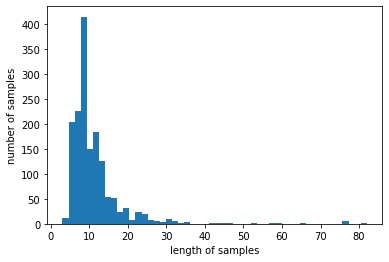

In [ ]:
  print('리뷰 데이터 최대 길이 : %d' % max(len(sentence) for sentence in sentences))
  print('리뷰 데이터 평균 길이 : %f' % (sum(map(len, sentences))/len(sentences)))
  plt.hist([len(sentence) for sentence in sentences], bins=50)
  plt.xlabel('length of samples')
  plt.ylabel('number of samples')
  plt.show()

##4-7. 정수 인코딩

각 단어에 정수 값을 부여하여 컴퓨터가 연산할 수 있도록 처리하기 위한 작업이다. 이를 위해 단어 빈도 수에 따른 단어 집합을 만들고, 그 순서대로 인덱스를 부여한다.


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorica

In [ ]:
src_tokenizer = Tokenizer(oov_token='OOV') # 토큰화 OOV는 아웃오브보캡, 사전에 없는 단어를 처리하기 위한 함수?
src_tokenizer.fit_on_texts(sentences) # 일반 단어에서, 빈도수가 높은 단어 순으로 인덱스 번호 부여

tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(ner_tags) # 태깅한 단어에서 빈도수가 높은 단어 순으로 인덱스 부여

vocab_size = len(src_tokenizer.word_index) + 1 # 워드 인덱스: 각 단어에 부여된 인덱스를 보여주는 메서드
tag_size = len(tar_tokenizer.word_index) + 1
print('단어 집합의 크기 : {}'.format(vocab_size))
print('개체명 태깅 정보 집합의 크기 : {}'.format(tag_size))

단어 집합의 크기 : 3816
개체명 태깅 정보 집합의 크기 : 29


In [ ]:
X_data = src_tokenizer.texts_to_sequences(sentences) # 일반 단어
y_data = tar_tokenizer.texts_to_sequences(ner_tags) # 태그들, 문자열을 리스트 형태의 정수 인덱스로 변환

print('첫번째 문장 :',X_data[0]) # 
print('첫번째 문장의 레이블 :',y_data[0])

첫번째 문장 : [23, 41, 1741, 4, 312, 884, 1169, 1742, 460, 41, 103]
첫번째 문장의 레이블 : [9, 14, 14, 1, 1, 9, 14, 14, 1, 1, 1]


In [ ]:
word_to_index = src_tokenizer.word_index # 정수 인코딩 매치 시키기
index_to_word = src_tokenizer.index_word
ner_to_index = tar_tokenizer.word_index
index_to_ner = tar_tokenizer.index_word
index_to_ner[0] = 'PAD'

print(index_to_ner)

{1: 'o', 2: 'b-siz', 3: 'b-sat', 4: 'i-siz', 5: 'b-mtr', 6: 'b-tmp', 7: 'b-cow', 8: 'b-col', 9: 'b-des', 10: 'i-sat', 11: 'i-mtr', 12: 'b-cod', 13: 'i-cod', 14: 'i-des', 15: 'i-col', 16: 'i-cow', 17: 'b-qlt', 18: 'b-prc', 19: 'b-wgt', 20: 'i-qlt', 21: 'b-dlv', 22: 'i-prc', 23: 'i-dlv', 24: 'i-tmp', 25: 'b-mng', 26: 'i-mng', 27: 'i-wgt', 28: '', 0: 'PAD'}


In [ ]:
X_data = pad_sequences(X_data, padding='post') # x: 일반 단어, 배열의 행 길이를 동일하게 맞춰준다, 방법은 마지막 열부터 모자란 개수만큼 (정수인코딩 중)
y_data = pad_sequences(y_data, padding='post') # y: 태그, 패딩작업이란 길이를 맞추는 것

In [ ]:
X_train, X_test, y_train_int, y_test_int = train_test_split(X_data, y_data, test_size=.1, random_state=1000)
# 검증용 데이터로 10%만 추출

In [ ]:
y_train = to_categorical(y_train_int, num_classes=tag_size) # 원핫인코딩, 태그사이즈 만큼의 배열에 y train 값위치에 1을 넣음
y_test = to_categorical(y_test_int, num_classes=tag_size)

In [ ]:
print('학습 문장 데이터의 크기 : {}'.format(X_train.shape))
print('학습 태그 데이터(정수 인코딩)의 크기 : {}'.format(y_train_int.shape))
print('학습 태그 데이터(원-핫 인코딩)의 크기 : {}'.format(y_train.shape))
print('검증 문장 데이터의 크기 : {}'.format(X_test.shape))
print('검증 태그 데이터(정수 인코딩)의 크기 : {}'.format(y_test_int.shape))
print('검증 태그 데이터(원-핫 인코딩)의 크기 : {}'.format(y_test.shape))

학습 문장 데이터의 크기 : (1420, 82)
학습 태그 데이터(정수 인코딩)의 크기 : (1420, 82)
학습 태그 데이터(원-핫 인코딩)의 크기 : (1420, 82, 29)
검증 문장 데이터의 크기 : (158, 82)
검증 태그 데이터(정수 인코딩)의 크기 : (158, 82)
검증 태그 데이터(원-핫 인코딩)의 크기 : (158, 82, 29)


# 5. BiLSTM을 이용한 모델링
학습 모델은 이 프로젝트의 목적이 리뷰 텍스트의 개체명인식이라는 점을 고려하였을 때, 여러 개의 입력과 여러 개의 출력이 존재하는 다 대 다(Many to many) 구조이므로 순환신경망(RNN)구조로 학습하는 것이 적절하며, 이전 시점과 이후 시점을 모두 고려하여 학습하고 기억할 필요가 있는 데이터를 기억하며 학습하는 BiLSTM이 개체명인식에 가장 적합하다고 판단하였다.

* 은닉층과 학습률, 에포크를 조정하며 각 모델의 정확도를 측정한 결과, 은닉층은 256, 학습률은 0.01, 에포크는 7일 때 가장 정확도가 높게 나타났다.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, InputLayer, Bidirectional, TimeDistributed, Embedding
from tensorflow.keras.optimizers import Adam

embedding_dim = 128 # 임베딩, 일상언어를 숫자로 변환, 수치화해서 다차원 공간의 벡터로 매핑, 훈련 데이터의 단어들을 임베딩 층으로 구현해서 임베딩 벡터로 학습, 층의 구현은 수치로 조절
hidden_units = 256 # 은닉층, 은닉층에서 특성을 추출한다. 특성이 추출되도록 순환된다. 256개의 순환 유닛을 가진다. 데이터가 적거나 태깅의 문제로 과대적합(오버피팅, 정확도가 떨어지는)이 발생한다.

model = Sequential() # 신경망 생성
model.add(Embedding(vocab_size, embedding_dim, mask_zero=True)) # 워드 임베딩
model.add(Bidirectional(LSTM(hidden_units, return_sequences=True))) # 양방향, LSTM 사용,
model.add(TimeDistributed(Dense(tag_size, activation=('softmax')))) #회귀함수로 소프트맥스 함수, 다중 클래스 분류(다 대 다 동작), 각스텝에서 오류 계산, 거기서 오류 전파
model.compile(loss='categorical_crossentropy', optimizer=Adam(0.001), metrics=['accuracy']) # 손실함수, 크로스엔트로피 함수로 에포크 조절해서 수행수

history = model.fit(X_train, y_train, batch_size=128, epochs=7, validation_split=0.1)

Epoch 1/30
10/10 [==============================] - 31s 2s/step - loss: 0.4313 - accuracy: 0.5107 - val_loss: 0.3675 - val_accuracy: 0.5908
Epoch 2/30
10/10 [==============================] - 16s 2s/step - loss: 0.3156 - accuracy: 0.5784 - val_loss: 0.2770 - val_accuracy: 0.5908
Epoch 3/30
10/10 [==============================] - 16s 2s/step - loss: 0.2594 - accuracy: 0.5784 - val_loss: 0.2612 - val_accuracy: 0.5908
Epoch 4/30
10/10 [==============================] - 17s 2s/step - loss: 0.2488 - accuracy: 0.5784 - val_loss: 0.2570 - val_accuracy: 0.5908
Epoch 5/30
10/10 [==============================] - 17s 2s/step - loss: 0.2438 - accuracy: 0.5784 - val_loss: 0.2557 - val_accuracy: 0.5902
Epoch 6/30
10/10 [==============================] - 17s 2s/step - loss: 0.2384 - accuracy: 0.5783 - val_loss: 0.2495 - val_accuracy: 0.5908
Epoch 7/30
10/10 [==============================] - 16s 2s/step - loss: 0.2333 - accuracy: 0.5777 - val_loss: 0.2437 - val_accuracy: 0.5933
Epoch 8/30
10/10 [==

# 6. 결과물 출력

In [ ]:
for i in range(0, 20): # 상위 20개 결과 출력
    y_predicted = model.predict(np.array([X_test[i]])) # 입력한 테스트용 샘플에 대해서 예측 y를 리턴
    y_predicted = np.argmax(y_predicted, axis=-1) # 확률 벡터를 정수 인코딩으로 변경함.
    labels = np.argmax(y_test[i], -1) # 원-핫 인코딩을 다시 정수 인코딩으로 변경함.

    print("{:15}|{:5}|{}".format("\n단어", "실제값", "예측값"))
    print(35 * "-")

    for word, tag, pred in zip(X_test[i], labels, y_predicted[0]):
        if word != 0: # PAD값은 제외함.
            print("{:17}: {:7} {}".format(index_to_word[word], index_to_ner[tag], index_to_ner[pred]))

# 7. 개선방향
전체적으로 빈도수가 높은 태그에 대해서는 비교적 정확하게 예측해내는 모습을 볼 수 있었지만, 원천 데이터의 수 자체가 적어 에포크가 높아질수록 특정 시점부터 검증 정확도가 들쭉날쭉해지는 과대적합 현상이 발생하였고, 0.76에서 0.77정도의 값에서 더 이상 높아지지 않았다. 이에 추후 개선할 방향을 제시해보고자 한다.



1.   절대적인 표본 크기 확보


>  자연어처리 학습에는 최소 수 만개의 데이터가 요구되나, 태깅 작업에 소요되는 시간이 많아 1500여 개의 문장을 태깅하는데 그쳤다. 이후 충분한 시간을 두고 태깅 작업을 하여 1만 개 이상의 데이터를 확보한다면 과대적합 문제는 해소될 것으로 기대된다.



2.   태깅 작업의 일관성 확보


>  태깅 작업은 결국 사람이 수동으로 해주는 작업이므로 태깅의 기준을 정하더라도 한국어 자연어의 모호성 때문에 태깅을 작성하는 사람의 주관이 주입될 수밖에 없었다. 이에 따라 같은 문맥과 단어에도 다른 태그가 붙은 경우로 인해 학습이 제대로 작동하지 못한 부분이 발생하였다. 태깅 작업에 있어서 조금 더 명확한 기준을 정하는 등의 방편이 필요한 것으로 보인다.



3.   전처리 방식 개선


>  이 프로젝트에서는 한국어 맞춤법 교정기가 형태소 분석기를 제대로 동작하게끔 만들기 위해 반드시 필요한 것으로 판단하였으나, 오히려 형태소 분석에 어려운 형태로 변환한 경우도 다수 발생하였다. 따라서 리뷰 텍스트에서 자주 등장하는 단어를 별도로 사전에 등록하여 이를 기반으로 맞춤법 교정 및 토큰화가 이루어질 수 있도록 처리하고, 불용어 사전 또한 제거할 단어를 보다 다각적으로 분석하여 정의할 필요가 있을 것으로 보인다.